# Data Processing and Splitting



## 0) Initialization

In [1]:
# Import the required modules:
import numpy as np
import os
from mnist import MNIST

# Define folder paths:
DATA_folder  = '../../Data/'
MNIST_folder = DATA_folder+'MNIST/'
CLUSTER_folder = DATA_folder+'Clusters/'

# Create Cluster Folder path
if not os.path.exists(CLUSTER_folder):
    os.makedirs(CLUSTER_folder)

## 1) Data Loading

In [2]:
# Read-in the images and labels:

mndata = MNIST(MNIST_folder)

train_images, train_labels = mndata.load_training()
test_images,  test_labels  = mndata.load_testing()

In [3]:
# Convert to numpy and clear regular:

train_imgs = np.array(train_images)
train_lbls = np.array(train_labels)
test_imgs = np.array(test_images)
test_lbls = np.array(test_labels)

train_images = None
train_labels = None
test_images  = None
test_labels  = None

## 3) Data Normalization

In [4]:
# Rescale all images to [0,1] scale
train_imgs = train_imgs/(np.float32(np.max(train_imgs)))
test_imgs  = test_imgs /(np.float32(np.max(test_imgs)))

## 4) Data Splitting (over digits)

In [5]:
### Split the train set over each digit:

# split_over_digits() - splits the dataset into subsets over each digit!!!
def split_over_digits(train_imgs,train_lbls):
    
    freq = [0,0,0,0,0,0,0,0,0,0]
    for k in range(0,len(train_lbls)):
        freq[train_lbls[k]]+=1
        
    train_subsets = []
    for k in range(0,10):
        l = 0
        subset = np.zeros((freq[k],784))
        for j in range(0,len(train_lbls)):
            if(train_lbls[j]==k):
                subset[l] = train_imgs[j]
                l+=1
        train_subsets.append(subset)
        
    return train_subsets

train_split = split_over_digits(train_imgs,train_lbls)

# # Check the separations:
# print(train_lbls[59990:60000])
# print(sum(train_split[9][-1]-train_imgs[-8]))
# print(sum(train_split[9][-2]-train_imgs[-10]))
# print(sum(train_split[8][-1]-train_imgs[-1]))
# print(sum(train_split[6][-1]-train_imgs[-2]))
# print(sum(train_split[5][-1]-train_imgs[-3]))

In [6]:
### Save the digit splits as numpy arrays for clustering:

for k in range(0,10):
    fl_nm = CLUSTER_folder+'train_'+str(k)+'.npy'
    np.save(fl_nm, train_split[k])

np.save(CLUSTER_folder+'train_imgs.npy', train_imgs)
np.save(CLUSTER_folder+'train_lbls.npy', train_lbls)
np.save(CLUSTER_folder+'test_imgs.npy', test_imgs)
np.save(CLUSTER_folder+'test_lbls.npy', test_lbls)


In [8]:
np.min(train_split[3])

0.0

## 5) Centering

In [41]:
# Check if all images are properly centered (they are 0_9)

from scipy import ndimage

for k in range(0,len(train_split)):
    for l in range(0,len(train_split[k])):
        a = train_split[k][l].reshape(28,28)
        c = ndimage.measurements.center_of_mass(a)
        if(c[0]<13.5 or c[1]<13.5 or c[0]>14.5 or c[1]>14.5):
            print((k,l))


(1, 2264)
(1, 5142)


In [44]:
a = train_split[1][5142].reshape(28,28)
c = ndimage.measurements.center_of_mass(a)
print(c)

(14.496950000000002, 13.493550000000001)


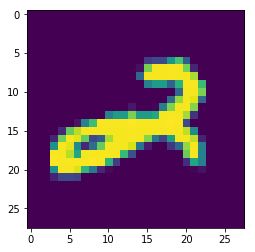

(14.313231442495775, 13.537081855253126)


In [35]:
a = train_split[2][141].reshape(28,28)

plt.imshow(a)
plt.show()